In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, accuracy_score

First, we'll import the spotify dataset to clean the data and conduct EDA.

In [29]:
data = pd.read_csv('taylor_swift_spotify.csv')
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289


In [30]:
# Data cleaning
data["release_date"] = pd.to_datetime(data["release_date"])
data["year"] = data["release_date"].dt.year

# There are many versions of each album. For this part of our analysis, we'll use the original versions of each album.
standard_albums = ['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989', 'reputation', 'Lover', 'folklore', 'evermore', 'Midnights']
standard_albums_data = data.loc[data['album'].isin(standard_albums)]

standard_albums_data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
108,108,Lavender Haze,Midnights,2022-10-21,1,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,0.2580,0.733,0.436,0.000573,0.157,-10.489,0.0800,96.985,0.0976,85,202395,2022
109,109,Maroon,Midnights,2022-10-21,2,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,0.0573,0.637,0.398,0.000001,0.101,-8.294,0.0564,108.075,0.0374,80,218270,2022
110,110,Anti-Hero,Midnights,2022-10-21,3,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,0.1300,0.637,0.643,0.000002,0.142,-6.571,0.0519,97.008,0.5330,92,200690,2022
111,111,Snow On The Beach (feat. Lana Del Rey),Midnights,2022-10-21,4,1wtOxkiel43cVs0Yux5Q4h,spotify:track:1wtOxkiel43cVs0Yux5Q4h,0.6900,0.663,0.319,0.000993,0.117,-13.481,0.0375,109.957,0.1930,78,256124,2022
112,112,"You're On Your Own, Kid",Midnights,2022-10-21,5,4D7BCuvgdJlYvlX5WlN54t,spotify:track:4D7BCuvgdJlYvlX5WlN54t,0.4010,0.696,0.396,0.000005,0.125,-10.289,0.0656,120.041,0.3800,85,194206,2022


#### Let's make some graphs to better understand the data

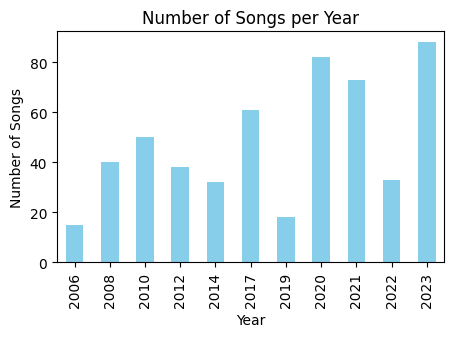

In [44]:
songs_per_year = data.groupby('year')['name'].count()

plt.figure(figsize=(5, 3))
songs_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

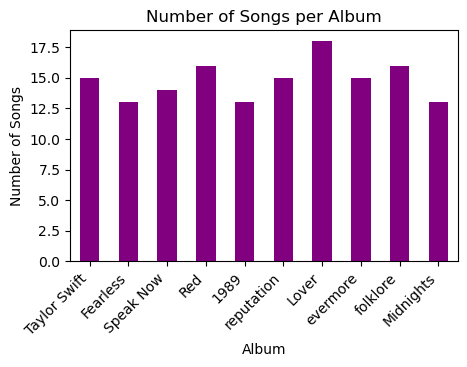

In [31]:
songs_per_album = standard_albums_data.groupby('album')['name'].count()

sorted_albums = standard_albums_data.sort_values('year')['album'].unique()

# Plotting
plt.figure(figsize=(5, 3))
songs_per_album.loc[sorted_albums].plot(kind='bar', color='purple')
plt.title('Number of Songs per Album')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()


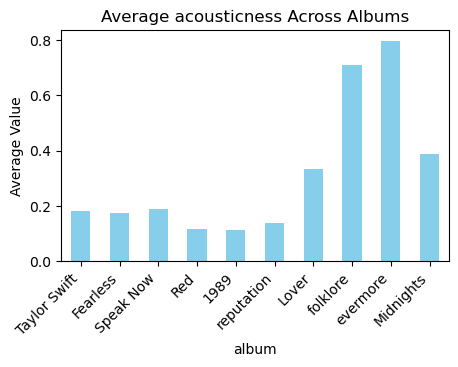

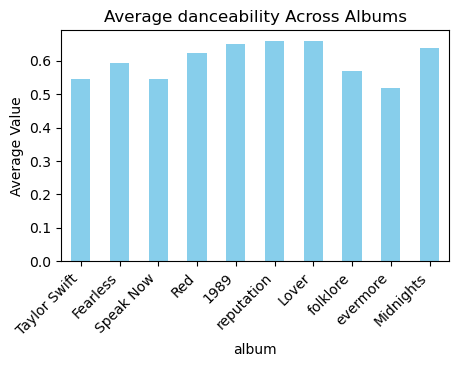

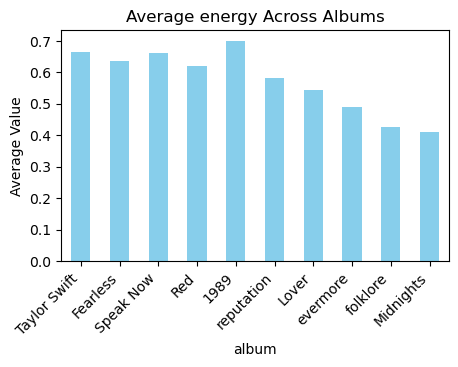

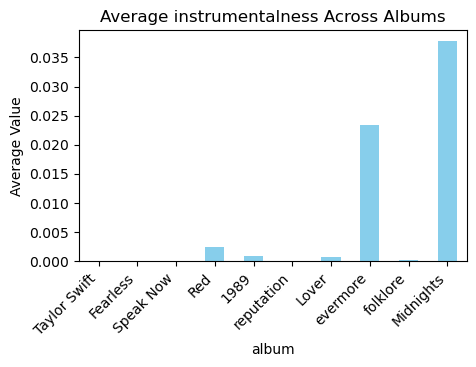

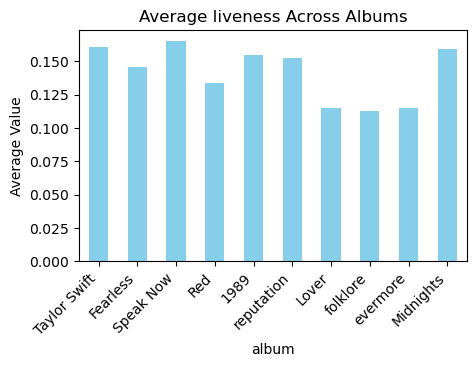

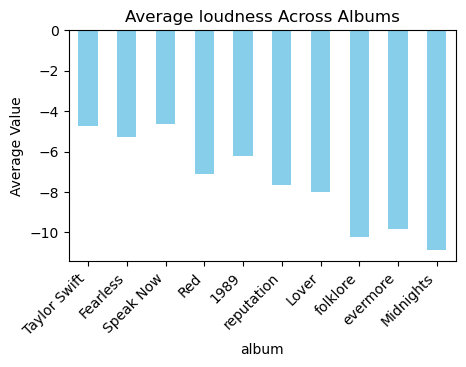

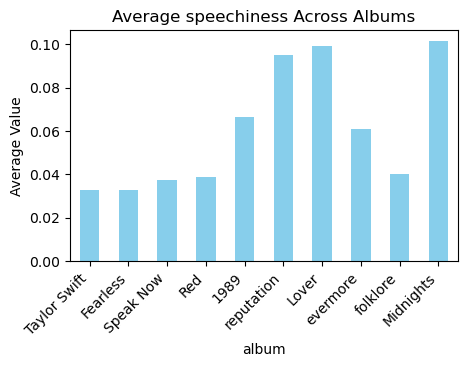

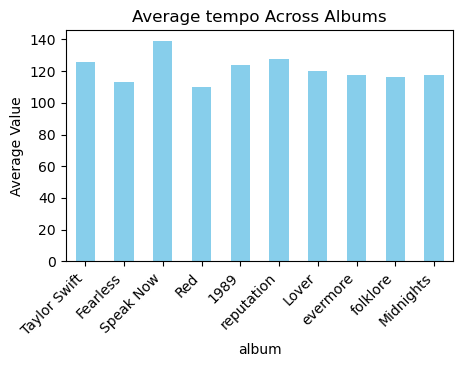

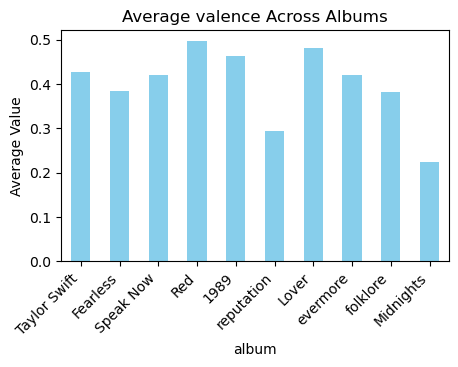

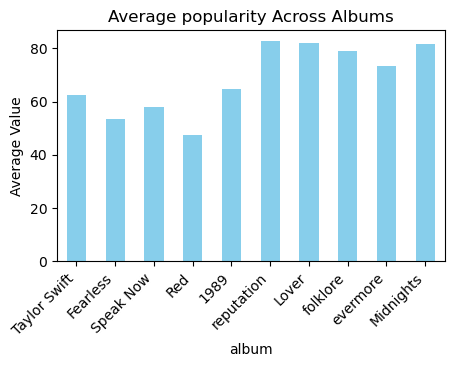

In [63]:
# Analyze columns of interest
columns = standard_albums_data.columns[7:-2]

for c in columns:
    plt.figure(figsize=(5, 3))
    plt.title(f'Average {c} Across Albums')
    plt.ylabel('Average Value')  

    average_per_album = standard_albums_data.groupby('album')[c].mean()

    sorted_albums = standard_albums_data.sort_values(['year', c], ascending=[True, False])['album'].unique()

    average_per_album.loc[sorted_albums].plot(kind='bar', color='skyblue')
    plt.xticks(rotation=45, ha='right')

    plt.show()

Let's utilize some of the linear and logistic methods we've learned in class to try to make predictions about songs and albums based on their Spotify metrics.

In [47]:
standard_albums_data.head()
X = standard_albums_data[['album', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']]
y = standard_albums_data['popularity']

X = pd.get_dummies(X, columns=['album'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [48]:
names, mses, rmses, r2s = [], [], [], []

def show_metrics(y_test, y_pred, model_type):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    result = f'''
    {model_type} MSE  : {mse}
    {model_type} RMSE : {rmse} 
    {model_type} R^2  : {r2}
    '''
    
    names.append(model_type)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)
    
    print(result)

Let's try to predict song popularity using linear regression.

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

show_metrics(y_test, lr_pred, "Linear Regression")


    Linear Regression MSE  : 58.10695992805188
    Linear Regression RMSE : 7.622792134648031 
    Linear Regression R^2  : 0.7397729745862608
    


In [50]:
rfr = RandomForestRegressor(random_state=40)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

show_metrics(y_test, rfr_pred, "Random Forest Regressor")


    Random Forest Regressor MSE  : 110.34071333333337
    Random Forest Regressor RMSE : 10.50431879434994 
    Random Forest Regressor R^2  : 0.5058485997492086
    


The above results were not great. This is likely due to .....
IS THERE ANY WAY TO ITERATE? OR IS IT NOT WORTH IT?

Next, let's try using logistic regression for a classification task. Here, we want to see if we can fit songs to albums based on their Spotify metrics.

In [51]:
X = standard_albums_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = standard_albums_data['album']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=13)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.26666666666666666


This is clearly not a very good model! Songs can have similar metrics across albums. Additionally, given that an album typically has less than 20 songs, there is limited training data and it is hard for the model to pick up on nuances.

When it comes to music, it may be better to look for patterns based on lyrics, since that's where the true essence of a song lies. Let's shift gears to analyze lyrical data using natural language processing techniques.

In [66]:
import os
from pathlib import Path
import re

albums = []
songs = []
lyrics = []

"""
Many albums are duplicated (deluxe version, etc). 
In order to prevent this sort of repetition, we're going to filter out the duplicates and live versions 
of songs by taking the Taylor's Version of each album, and take the version with the most songs (most deluxe tracks). 
If there is not a Taylor's Version of an album, we will just take the longest version of that album.
"""

standard_albums = ['TaylorSwift', 'Fearless_TaylorsVersion_', 'SpeakNow', 'Red_TaylorsVersion_', '1989', 'Reputation', 'Lover', 'Folklore', 'Evermore', 'Midnights_TheTillDawnEdition_']

for dirname, _, filenames in os.walk('all_song_data/Albums'):
    album_name = os.path.split(dirname)[-1]
    if album_name in standard_albums:
        for filename in filenames:
            albums.append(album_name)
            songs.append(Path(filename).stem)

            with open(os.path.join(dirname, filename), 'r', encoding='utf-8') as f:
                raw_lyrics = f.read()

            # Clean up the lyrics by replacing non-standard characters
            raw_lyrics = raw_lyrics.encode('ascii', 'replace').decode().replace('?', ' ')
            raw_lyrics = raw_lyrics.replace('\n', ' ')
            raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)
            
            # Remove any words between brackets (Chorus, etc.)
            pattern = re.compile(r'\[.*?\]')
            # Use sub() method to replace matched patterns with an empty string
            raw_lyrics = re.sub(pattern, '', raw_lyrics)
        
            # Remove lyrics header
            raw_lyrics = re.sub('.*Lyrics', '', raw_lyrics)

            # Remove end characters (number + 'Embed' or number + 'KEmbed')
            raw_lyrics = re.sub('[0-9]+KEmbed', '', raw_lyrics)
            raw_lyrics = re.sub('[0-9]+Embed', '', raw_lyrics)

            lyrics.append(raw_lyrics)

preprocessed_df = pd.DataFrame({'Album': albums, 'Song': songs, 'Lyrics': lyrics})
preprocessed_df.dropna()
preprocessed_df.head()

,Album,Song,Lyrics
0,Fearless_TaylorsVersion_,TheWayILovedYou_TaylorsVersion_,He is sensible and so incredible And all my s...
1,Fearless_TaylorsVersion_,Fifteen_TaylorsVersion_,You take a deep breath and you walk through t...
2,Fearless_TaylorsVersion_,DontYou_TaylorsVersion__FromtheVault_,"Hey, I knew I'd run into you somewhere It's b..."
3,Fearless_TaylorsVersion_,TheOtherSideoftheDoor_TaylorsVersion_,In the heat of the fight I walked away Ignori...
4,Fearless_TaylorsVersion_,JumpThenFall_TaylorsVersion_,I like the way you sound in the mornin' We're...


A common practice in NLP when doing sentiment analysis is creating word clouds to get a sense of the overall trends in a dataset and to make sure data is being represented the way we'd like.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


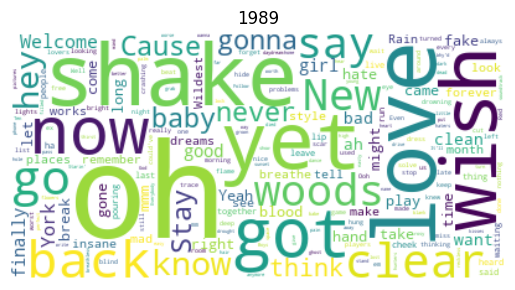

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


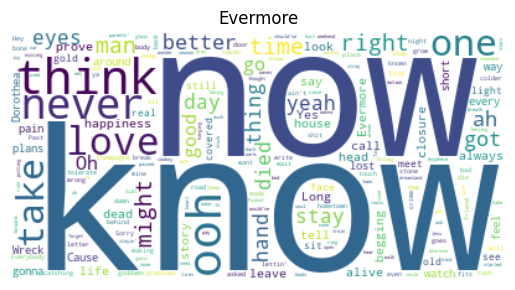

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


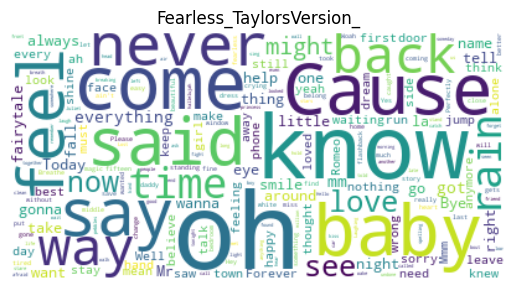

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


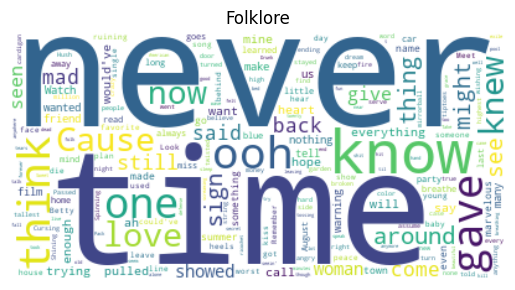

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


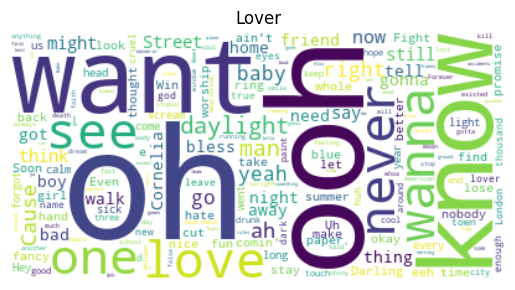

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


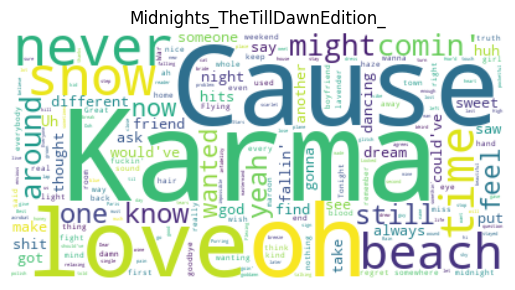

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


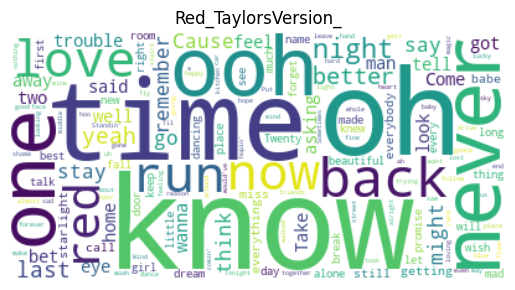

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


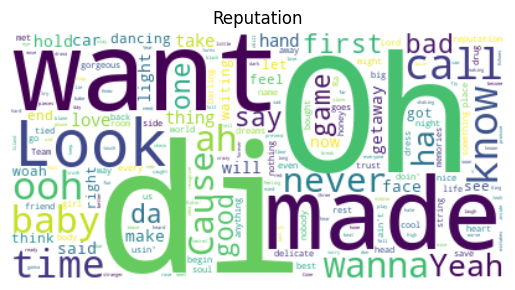

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


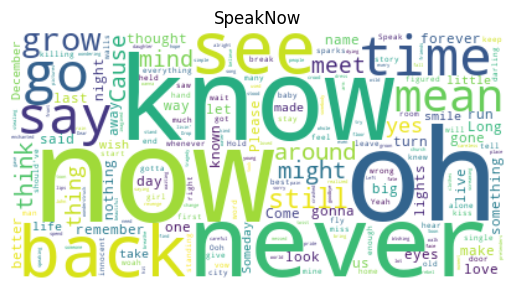

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


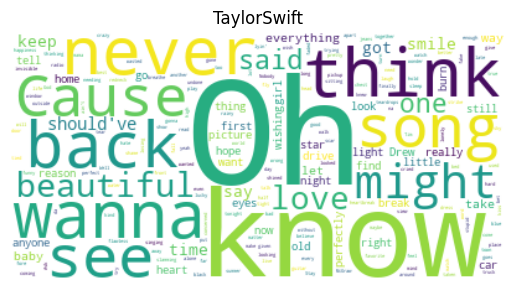

In [53]:
# Create word cloud and plot visualization for each album
from wordcloud import WordCloud
import matplotlib.pyplot as plt

album_group = preprocessed_df.groupby('Album')

for name, group in album_group:
    wordcloud = WordCloud(collocations = False, 
                          background_color = 'white').generate(' '.join(group['Lyrics']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(name)
    plt.axis("off")
    plt.show()

These word clouds give us a sense of common words used throughout albums. They also highlight some words we might not want to include in our NLP techniques - these include words with minimal emotional value like "oh" and "ooh."

Now, we will perform sentiment analysis using NLTK and Textblob. We'll compare the results in a nicely formatted table to keep track of differences.

In [54]:
# Sentiment analysis by album
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from termcolor import colored

# Display results in an easy-to-interpret table. Positive = green, negative = red
from prettytable import PrettyTable
nltk.download('vader_lexicon')

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Song Title", "NLTK", "TextBlob"]

# Function for sentiment analysis using NLTK's VADER sentiment analysis tool
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function for sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)

    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
# function to get the appropriate color for the given sentiment
def get_color(sentiment):
    if sentiment == 'Positive':
        return 'green'
    else:
        return 'red'

for name, group in album_group:
    
    songs = group.groupby('Song')
    
    for title, lyrics in songs:
    
        # Sentiment analysis using NLTK
        sentiment_nltk = analyze_sentiment_nltk(' '.join(lyrics['Lyrics']))
        nltk_color = get_color(sentiment_nltk)

        # Sentiment analysis using TextBlob
        sentiment_textblob = analyze_sentiment_textblob(' '.join(lyrics['Lyrics']))
        textblob_color = get_color(sentiment_textblob)

        row = [title, colored(sentiment_nltk, nltk_color), colored(sentiment_textblob, textblob_color)]
        table.add_row(row)
        
print(table)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/neetidesai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


+-----------------------------------------------------------+----------+----------+
|                         Song Title                        |   NLTK   | TextBlob |
+-----------------------------------------------------------+----------+----------+
|                       1989_Booklet_                       | Positive | Positive |
|                    AllYouHadtoDoWasStay                   | Positive | Positive |
|                          BadBlood                         | Negative | Negative |
|                         BlankSpace                        | Negative | Negative |
|                           Clean                           | Positive | Positive |
|                      HowYouGetTheGirl                     | Negative | Negative |
|                        IKnowPlaces                        | Negative | Negative |
|                       IWishYouWould                       | Negative | Positive |
|                       OutOfTheWoods                       | Positive | Pos

https://github.com/UtkarshRedd/Negation_handlingThe above results are okay, but not great. The basic idea behind sentiment analysis is that each word is analyze out of context (so for example, if the word 'important' is seen in Would've, Could've, Should've, it will be classified as positive even though in context the lyric is negative (But, Lord, you made me feel important/And then you tried to erase us)).

So, to fix this issue and get a more accurate sentiment analysis, we need to analyze words in context!

I will be using the code in this repo: https://github.com/UtkarshRedd/Negation_handling to do so.

In [55]:
# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Song Title", "NLTK", "TextBlob", "NLTK Negation"]

def negation_handler(sentence):	
    temp = int(0)
    for i in range(len(sentence)):
        if sentence[i-1] in ['not',"n't"]:
            antonyms = []
            for syn in wordnet.synsets(sentence[i]):
                syns = wordnet.synsets(sentence[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(sentence[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                        temp = 1 - word1.wup_similarity(word2)
                    if temp>max_dissimilarity:
                        max_dissimilarity = temp
                        antonym_max = ant
                        sentence[i] = antonym_max
                        sentence[i-1] = ''
#     while '' in sentence:
#         sentence.remove('')
    return sentence


# Function for sentiment analysis using NLTK's VADER sentiment analysis tool
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
# function to get the appropriate color for the given sentiment
def get_color(sentiment):
    if sentiment == 'Positive':
        return 'green'
    else:
        return 'red'

for name, group in album_group:
    songs = group.groupby('Song')
    
    for title, lyrics in songs:
    
        # Sentiment analysis using NLTK
        sentiment_nltk = analyze_sentiment_nltk(' '.join(lyrics['Lyrics']))
        nltk_color = get_color(sentiment_nltk)

        # Sentiment analysis using TextBlob
        sentiment_textblob = analyze_sentiment_textblob(' '.join(lyrics['Lyrics']))
        textblob_color = get_color(sentiment_textblob)

        # Sentiment analysis using NLTK with negation handling
        lyrics = negation_handler(' '.join(lyrics['Lyrics']))
        sentiment_nltk_negation = analyze_sentiment_nltk(lyrics)
        nltk_negation_color = get_color(sentiment_nltk_negation)
        
        row = [title, colored(sentiment_nltk, nltk_color), colored(sentiment_textblob, textblob_color), colored(sentiment_nltk_negation, nltk_negation_color)]
        table.add_row(row)
        
print(table)

+-----------------------------------------------------------+----------+----------+---------------+
|                         Song Title                        |   NLTK   | TextBlob | NLTK Negation |
+-----------------------------------------------------------+----------+----------+---------------+
|                       1989_Booklet_                       | Positive | Positive |    Positive   |
|                    AllYouHadtoDoWasStay                   | Positive | Positive |    Positive   |
|                          BadBlood                         | Negative | Negative |    Negative   |
|                         BlankSpace                        | Negative | Negative |    Negative   |
|                           Clean                           | Positive | Positive |    Positive   |
|                      HowYouGetTheGirl                     | Negative | Negative |    Negative   |
|                        IKnowPlaces                        | Negative | Negative |    Negative   |


Unfortunately, the NLTK with negation handling didn't provide us with results we wanted. All the predictions are the same as they were using regular NLTK. Reasons for this include....

In [1]:
from pathlib import Path
import re
import os
import pandas as pd

albums = []
songs = []
lyrics = []

standard_albums = ['TaylorSwift', 'Fearless_TaylorsVersion_', 'SpeakNow_Deluxe', 'Red_TaylorsVersion_', '1989', 'Reputation', 'Lover', 'Folklore', 'evermore_deluxeversion_', 'Midnights_TheTillDawnEdition_']

for dirname, _, filenames in os.walk('all_song_data/Albums'):
    album_name = os.path.split(dirname)[-1]
    if album_name in standard_albums:
        for filename in filenames:
            albums.append(album_name)
            songs.append(Path(filename).stem)

            with open(os.path.join(dirname, filename), 'r', encoding='utf-8') as f:
                raw_lyrics = f.read()
                
                # Clean up the lyrics by replacing non-standard characters
                raw_lyrics = raw_lyrics.encode('ascii', 'replace').decode().replace('?', ' ')
                raw_lyrics = raw_lyrics.replace('\n', ' ')
                raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)

                # Remove any words between brackets (Chorus, etc.)
                pattern = re.compile(r'\[.*?\]')
                # Use sub() method to replace matched patterns with an empty string
                raw_lyrics = re.sub(pattern, '', raw_lyrics)

                # Remove lyrics header
                raw_lyrics = re.sub('.*Lyrics', '', raw_lyrics)

                # Remove end characters (number + 'Embed' or number + 'KEmbed')
                raw_lyrics = re.sub('[0-9]+KEmbed', '', raw_lyrics)
                raw_lyrics = re.sub('[0-9]+Embed', '', raw_lyrics)
                
                lyrics.append(raw_lyrics)

print(len(raw_lyrics))
df = pd.DataFrame({'Album': albums, 'Song': songs, 'Lyrics': lyrics})

df.head()

1296


,Album,Song,Lyrics
0,Fearless_TaylorsVersion_,TheWayILovedYou_TaylorsVersion_,He is sensible and so incredible And all my s...
1,Fearless_TaylorsVersion_,Fifteen_TaylorsVersion_,You take a deep breath and you walk through t...
2,Fearless_TaylorsVersion_,DontYou_TaylorsVersion__FromtheVault_,"Hey, I knew I'd run into you somewhere It's b..."
3,Fearless_TaylorsVersion_,TheOtherSideoftheDoor_TaylorsVersion_,In the heat of the fight I walked away Ignori...
4,Fearless_TaylorsVersion_,JumpThenFall_TaylorsVersion_,I like the way you sound in the mornin' We're...


In [4]:
#Import the libraries for preprocessing, stemming, lemmatization, removing english stopwords & punctuations
from pathlib import Path
import string
import nltk
import os

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
    
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()


stop_words = stopwords.words('english')
stop_words.extend(['oh', 'ooh', 'ah', 'like', "i'm", "that's", "i'd", "us", "we", "i've", "ya", "'til", "ohoh", "'cause", "we're", "us", "i'll"])

import string
exclude = set(string.punctuation)

#Create a single function to preprocess
def clean(doc):

    doc = doc.lower()

    doc_list = doc.split()

    # remove anything that's not an apostrophe so it doesn't interfere with stopword removal (ie words in quotes, etc.)
    punc_free_1 = remove_punc_1(doc_list)
    stop_free = remove_stopwords(punc_free_1)
    punc_free_2 = remove_punc_2(stop_free)
    normalized = normalize(punc_free_2)

    return normalized

def remove_punc_1(doc):
    return_list = []

    for word in doc:
        return_list.append("".join(ch for ch in word if ch not in exclude or ch=="'"))

    return return_list

def remove_stopwords(doc):
    return [word for word in doc if word not in stop_words]

def remove_punc_2(doc):
    return_list = []

    for word in doc:
        return_list.append("".join(ch for ch in word if ch not in exclude))

    return return_list 

def normalize(doc):
      return [wordnet_lemmatizer.lemmatize(word) for word in doc]


uncleaned_doc = [line.split() for line in df['Lyrics']] 
doc_clean = [clean(line) for line in df['Lyrics']] 

df_test = pd.DataFrame(doc_clean)

df_test.to_csv('teststop3.csv')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dessydusichka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dessydusichka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dessydusichka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### First, let's try using gensim for Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA), two NLP techniques

We learned about these techniques and found some implementation examples here: https://www.datacamp.com/tutorial/what-is-topic-modeling

In [33]:
#Import the Gensim libraries
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

#Create the corpora matrix
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]
#Initiate the model
Lda = gensim.models.ldamodel.LdaModel

num_topics = 6

#Fit the model with corpora matrix with dictionary for 20 topics
ldamodel = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)

#Check the results for 20 topics
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))
    
#Check the score for a random sentence (100th) in the book
example = doc_clean[100]
# print(example,'\n')
example_lda = dictionary.doc2bow(example)

Topic: 0 Word: 0.017*"love" + 0.014*"never" + 0.014*"time" + 0.011*"know" + 0.011*"go" + 0.011*"stay" + 0.009*"one" + 0.009*"back" + 0.009*"karma" + 0.009*"run"

Topic: 1 Word: 0.020*"never" + 0.018*"come" + 0.011*"back" + 0.011*"know" + 0.009*"knew" + 0.008*"cant" + 0.008*"could" + 0.008*"away" + 0.008*"trouble" + 0.008*"car"

Topic: 2 Word: 0.030*"know" + 0.021*"wanna" + 0.015*"love" + 0.014*"look" + 0.011*"yet" + 0.010*"yeah" + 0.010*"one" + 0.010*"say" + 0.009*"got" + 0.009*"good"

Topic: 3 Word: 0.021*"want" + 0.017*"call" + 0.015*"know" + 0.012*"get" + 0.010*"one" + 0.010*"yeah" + 0.009*"time" + 0.008*"ha" + 0.008*"could" + 0.008*"take"

Topic: 4 Word: 0.015*"know" + 0.015*"never" + 0.011*"baby" + 0.011*"man" + 0.011*"red" + 0.010*"got" + 0.009*"ever" + 0.009*"said" + 0.008*"love" + 0.008*"think"

Topic: 5 Word: 0.017*"know" + 0.016*"time" + 0.014*"think" + 0.014*"wish" + 0.012*"shake" + 0.010*"thing" + 0.009*"right" + 0.009*"still" + 0.009*"one" + 0.009*"get"



In [32]:
from gensim.models import LsiModel

# LSA model
lsamodel = LsiModel(corpus, num_topics=6, id2word = dictionary)

#Check the results for 20 topics
for idx, topic in lsamodel.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: -0.434*"know" + -0.241*"love" + -0.227*"never" + -0.206*"time" + -0.166*"one" + -0.160*"back" + -0.157*"go" + -0.151*"got" + -0.142*"want" + -0.142*"say"

Topic: 1 Word: 0.865*"shake" + 0.244*"gonna" + 0.199*"fake" + 0.176*"hate" + 0.165*"play" + 0.162*"break" + 0.089*"mmmmmm" + -0.074*"know" + 0.068*"baby" + -0.061*"wish"

Topic: 2 Word: -0.744*"yet" + -0.441*"wood" + -0.429*"clear" + -0.127*"good" + -0.099*"remember" + 0.092*"know" + -0.083*"" + -0.069*"looking" + -0.042*"yeah" + -0.036*"shake"

Topic: 3 Word: -0.685*"wish" + 0.416*"know" + -0.337*"would" + -0.197*"never" + -0.165*"love" + -0.158*"right" + -0.148*"back" + 0.102*"look" + 0.096*"better" + -0.094*"knew"

Topic: 4 Word: 0.587*"know" + 0.387*"wish" + -0.321*"love" + 0.235*"better" + -0.216*"time" + -0.166*"call" + 0.157*"would" + -0.136*"want" + -0.116*"never" + -0.115*"baby"

Topic: 5 Word: 0.519*"want" + 0.495*"call" + -0.476*"love" + 0.176*"one" + 0.155*"wish" + -0.147*"wanna" + 0.094*"time" + -0.088*"da

In [23]:
from gensim.models.coherencemodel import CoherenceModel
Lda = gensim.models.ldamodel.LdaModel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3, model=1):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of topic models
              coherence_values : Coherence values corresponding to the model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        if model == 1:
            trained_model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        elif model == 2:
            trained_model = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)
        
        model_list.append(trained_model)
        coherencemodel = CoherenceModel(model=trained_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

##### Let's compare the coherence of gensim LDA and LSA with different numbers of topics

LSA Model


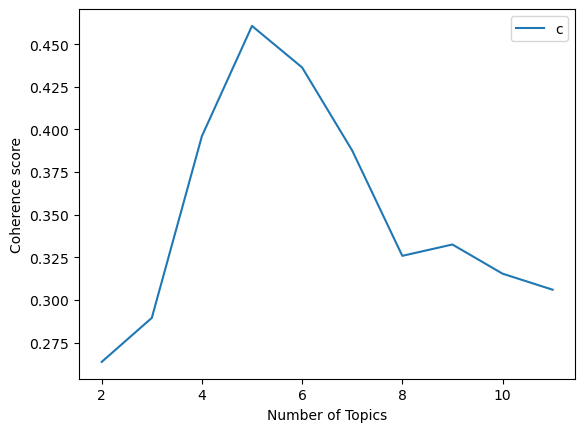

LDA Model


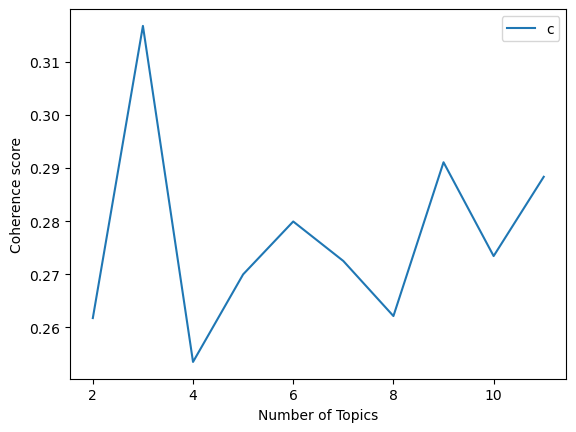

In [25]:
def plot_graph(doc_clean,start, stop, step, model):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step, model)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,12,1
print("LSA Model")
plot_graph(doc_clean,start,stop,step, 1)
print("LDA Model")
plot_graph(doc_clean,start,stop,step, 2)

We see that the LSA model has higher coherence values around 0.46 as compared to LDA's score of 0.31. In LSA, it appears that 5 topics are optimal, while LDA has the highest score for a model with 3 topics.

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0 good resource for qualitative testing of out-of-the-box NLP models

In [ ]:
#Import the Gensim libraries
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import numpy as np
import tqdm
import warnings
warnings.filterwarnings('ignore')

# create dictionary
dictionary = corpora.Dictionary(doc_clean)
# create corpus
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

def calculate_lda_coherence(corpus, original_text, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=original_text, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

def calculate_lsa_coherence(corpus, original_text, dictionary, k, p, d):
    
    lsa_model = LsiModel(corpus=corpus,
                                        id2word=dictionary,
                                        num_topics=k, 
                                        chunksize=100,
                                        power_iters=p,
                                        decay=d)
    
    coherence_model_lsa = CoherenceModel(model=lsa_model, texts=original_text, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lsa.get_coherence()


# Topics range
min_topics = 3
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Validation sets
num_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_docs*0.75)), 
            corpus]

corpus_title = ['75% Corpus', '100% Corpus']

# Can take a long time to run
if 1 == 2:
    tuned_grid_lda = {}
    tuned_grid_lda['Validation_Set'] = {}

    # Alpha parameters
    alpha = ['symmetric', 'asymmetric', 0.1, 0.3, 0.5, 0.7, 0.9]

    # Beta parameters
    beta = ['symmetric', 0.1, 0.3, 0.5, 0.7, 0.9]

    model_results_lda = {'Validation_Set': [],
                    'Topics': [],
                    'Alpha': [],
                    'Beta': [],
                    'Coherence': []
                    }

    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    print(a, k, b)
                    # get the coherence score for the given parameters
                    cv = calculate_lda_coherence(corpus=corpus_sets[i], original_text=doc_clean, dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results_lda['Validation_Set'].append(corpus_title[i])
                    model_results_lda['Topics'].append(k)
                    model_results_lda['Alpha'].append(a)
                    model_results_lda['Beta'].append(b)
                    model_results_lda['Coherence'].append(cv)
 
                    print('coherence: ', cv)
                    pbar.update(1)

    pd.DataFrame(model_results_lda).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

print('done with lda')

# Can take a long time to run
if 1 == 1:
    tuned_grid_lsa = {}
    tuned_grid_lsa['Validation_Set'] = {}

    # power iter parameters
    power_iters = [0, 1, 4, 6, 8, 10]

    # decay parameters
    decay = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

    model_results_lsa = {'Validation_Set': [],
                    'Topics': [],
                    'Power_iters': [],
                    'Decay': [],
                    'Coherence': []
                    }

    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for p in power_iters:
                # iterare through beta values
                for d in decay:

                    print(p, k, d)
                    # get the coherence score for the given parameters
                    cv = calculate_lsa_coherence(corpus=corpus_sets[i], original_text=doc_clean, dictionary=dictionary, 
                                                  k=k, p=p, d=d)
                    # Save the model results
                    model_results_lsa['Validation_Set'].append(corpus_title[i])
                    model_results_lsa['Topics'].append(k)
                    model_results_lsa['Power_iters'].append(p)
                    model_results_lsa['Decay'].append(d)
                    model_results_lsa['Coherence'].append(cv)
 
                    print('coherence: ', cv)
                    pbar.update(1)

    pd.DataFrame(model_results_lsa).to_csv('lsa_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
import matplotlib

lda_tuning = pd.read_csv('lda_tuning_results.csv')


max_coherence_for_topic_num = {x:(0, 0, 0) for x in range(min_topics, max_topics)}
# tuple value is (coherence, alpha, beta)

for row in range(1, len(lda_tuning)):

    num_topics = lda_tuning['Topics'][row]

    alpha = lda_tuning['Alpha'][row]
    beta = lda_tuning['Beta'][row]
    coherence = lda_tuning['Coherence'][row]

    if coherence > max_coherence_for_topic_num[num_topics][0]:
        max_coherence_for_topic_num[num_topics] = (coherence, alpha, beta)

max_coherence = max(max_coherence_for_topic_num.values(), key=lambda x: x[0])

print(max_coherence_for_topic_num)

print('max coherence: ', max_coherence)

{10: (0.3583726950723186, 'asymmetric', '0.9099999999999999'), 11: (0.3825996372106018, '0.31', '0.9099999999999999'), 12: (0.3999322781595438, '0.61', '0.9099999999999999'), 13: (0.3996870900475195, '0.61', '0.9099999999999999'), 14: (0.4239334890253704, 'asymmetric', '0.9099999999999999'), 15: (0.3847146828483475, '0.31', '0.9099999999999999'), 16: (0.4524772401776282, 'asymmetric', '0.9099999999999999'), 17: (0.4675949947101731, 'asymmetric', '0.9099999999999999'), 18: (0.4087240667022192, '0.9099999999999999', '0.61'), 19: (0.4234103418824711, 'asymmetric', '0.9099999999999999'), 20: (0.4577099959404342, 'asymmetric', '0.9099999999999999'), 21: (0.4403225013975597, 'symmetric', '0.9099999999999999'), 22: (0.4693557310066991, 'asymmetric', '0.9099999999999999'), 23: (0.4511045627030792, 'asymmetric', '0.9099999999999999'), 24: (0.5254122864554832, 'asymmetric', '0.9099999999999999')}
max coherence:  (0.5254122864554832, 'asymmetric', '0.9099999999999999')


In [174]:
'''comparing different ML packages - doing LDA with scikit. Then comparing that with NMF using
scikit. Finally, tuning for optimal hyperparameters and testing coherence scores to find the best 
topic modeling algorithm. We will further improve this algorithm by iterating on stopwords
to make them more relevant to Swift's discography and commonly used filler words. Using this article
as reference: https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730'''

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

# step 1: LDA and NMF with scikit learn

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        # print("Topic %d:" % (topic_idx))
        # print(" ".join([feature_names[i]
        #                 for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
        topics.append(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
    return topics

no_features = 1000

# NMF is able to use tf-idf

# turn doc_clean into 1D array
doc_1d = [elem for sublist in doc_clean for elem in sublist]

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(doc_1d)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(doc_1d)
tf_feature_names = tf_vectorizer.get_feature_names_out()

no_topics = 6

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
nmf_topics_1 = display_topics(nmf, tfidf_feature_names, no_top_words)
lda_topics_1 = display_topics(lda, tf_feature_names, no_top_words)


# step 2: customize stop words and try again
all_stop_words = ENGLISH_STOP_WORDS.union(set(['oh', 'ooh', 'ah', 'like', "i'm", "that's", "i'd", "us", "we", "i've", "ya", "'til", "ohoh", "'cause", "we're", "us", "i'll", "would've", "thing"]))

tokenizer = TfidfVectorizer().build_tokenizer() 

all_stop_words = sum([tokenizer(sw) for sw in all_stop_words], [])

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=list(all_stop_words))
tfidf = tfidf_vectorizer.fit_transform(doc_1d)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=list(all_stop_words))
tf = tf_vectorizer.fit_transform(doc_1d)
tf_feature_names = tf_vectorizer.get_feature_names_out()

no_topics = 6

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
nmf_topics_2 = display_topics(nmf, tfidf_feature_names, no_top_words)
lda_topics_2 = display_topics(lda, tf_feature_names, no_top_words)

print(nmf_topics_2)




# make a table to compare topics before and after stop word customization
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Topic Number", "NMF (no stopword modifiation)", "NMF (stopword modifiation)", "LDA (no stopword modifiation)", "LDA (stopword modifiation)"]
    

for idx, topic in enumerate(zip(nmf_topics_1, nmf_topics_2, lda_topics_1, lda_topics_2)):
    
    row = [f"Topic {idx+1}", topic[0], topic[1], topic[2], topic[3]]
    table.add_row(row)
        
print(table)


['know want baby yeah thing wanna right said come look', 'love baby right look feel stay tell way girl away', 'time baby want yeah thing wanna come look feel stay', 'say want yeah thing wanna said right night tell eye', 'think baby want yeah thing wanna come look stay tell', 'got baby want yeah thing wanna said come look night']
+--------------+--------------------------------------------------------+------------------------------------------------------+--------------------------------------------------------------+---------------------------------------------------------------------+
| Topic Number |             NMF (no stopword modifiation)              |              NMF (stopword modifiation)              |                LDA (no stopword modifiation)                 |                      LDA (stopword modifiation)                     |
+--------------+--------------------------------------------------------+------------------------------------------------------+-----------------

Ok, these topics aren't the best! I'm going to modify the stopwords and try again. Some common and irrelevant words that are included in the model that I want to exclude:

baby, got, yeah, thats, ive, ill, ooh, ohoh, oh